In [1]:
import numpy as np
import pandas as pd
from nltk.corpus import stopwords

In [3]:
from gensim import corpora, models, similarities

WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.


In [14]:
import codecs
import logging

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',level=logging.INFO)
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)
logging.debug("test")

DEBUG:root:test


In [87]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [100]:
EN_STOPWORDS = stopwords.words('english')
print len(EN_STOPWORDS)

127


In [98]:
VI_STOPWORDS = []
with codecs.open("/home/laampt/orm/10K/stopwords_uit.txt", encoding="utf-8", mode="r") as fin:
    VI_STOPWORDS = fin.readlines()

VI_STOPWORDS = [w.replace('\n','') for w in VI_STOPWORDS if w]
print len(VI_STOPWORDS), VI_STOPWORDS[-1]

571 ý_da


In [101]:
STOPWORDS = VI_STOPWORDS + EN_STOPWORDS
STOPWORDS = list(set(STOPWORDS))
print len(STOPWORDS), STOPWORDS[-1]

694 once


In [ ]:
class ViSentences(object):
    def __iter__(self):
        for line in codecs.open("/home/laampt/orm/10K/tok/PD.35Kdoc.50words.nodup2", encoding='utf-8', mode='r'):
            words = line.replace('.',' ').strip().split()
            words = [w for w in words if not(w in STOPWORDS) and not(w.find(u"_NUM") > 0) and not(w.startswith(u'-'))]
            yield words

In [102]:
sentences = ViSentences()
dictionary = corpora.Dictionary(sentences)

INFO:gensim.corpora.dictionary:adding document #0 to Dictionary(0 unique tokens: [])
INFO:gensim.corpora.dictionary:adding document #10000 to Dictionary(37573 unique tokens: [u'gai', u'c\u01a1_ng\u01a1i', u'Ti\u1ec3u_Cao', u'l\u01b0\u1ee3t', u'L\xfd_lu\u1eadn']...)
INFO:gensim.corpora.dictionary:adding document #20000 to Dictionary(51048 unique tokens: [u'gai', u'c\u01a1_ng\u01a1i', u'B\u1ec9_V\u1ecf', u'Ti\u1ec3u_Cao', u'l\u01b0\u1ee3t']...)
INFO:gensim.corpora.dictionary:adding document #30000 to Dictionary(65180 unique tokens: [u'gai', u'c\u01a1_ng\u01a1i', u'B\u1ec9_V\u1ecf', u'Ti\u1ec3u_Cao', u'l\u01b0\u1ee3t']...)
INFO:gensim.corpora.dictionary:built Dictionary(69817 unique tokens: [u'gai', u'c\u01a1_ng\u01a1i', u'B\u1ec9_V\u1ecf', u'Ti\u1ec3u_Cao', u'l\u01b0\u1ee3t']...) from 35245 documents (total 2695340 corpus positions)


In [103]:
print dictionary

Dictionary(69817 unique tokens: [u'gai', u'c\u01a1_ng\u01a1i', u'B\u1ec9_V\u1ecf', u'Ti\u1ec3u_Cao', u'l\u01b0\u1ee3t']...)


In [110]:
class PDCorpus(object):
    def __init__(self, dictionary):
        self.dictionary = dictionary
    def __iter__(self):
        for line in codecs.open('/home/laampt/orm/10K/tok/PD.35Kdoc.50words.nodup2', encoding='utf-8', mode='r'):
            words = line.replace('.',' ').strip().split()
            words = [w for w in words if not(w in STOPWORDS) and not(w.find(u"_NUM") > 0) and not(w.startswith(u'-'))]
            yield self.dictionary.doc2bow(words)

In [111]:
corpus = PDCorpus(dictionary)

In [112]:
print corpus

In [113]:
dictionary.token2id[u"đe_dọa"]

1250

In [108]:
dictionary.save("/home/laampt/orm/10K/pd_corpus.dict2")

INFO:gensim.utils:saving Dictionary object under /home/laampt/orm/10K/pd_corpus.dict2, separately None


In [114]:
corpora.MmCorpus.serialize('/home/laampt/orm/10K/pd_corpus.mm2', corpus)

INFO:gensim.corpora.mmcorpus:storing corpus in Matrix Market format to /home/laampt/orm/10K/pd_corpus.mm2
INFO:gensim.matutils:saving sparse matrix to /home/laampt/orm/10K/pd_corpus.mm2
INFO:gensim.matutils:PROGRESS: saving document #0
INFO:gensim.matutils:PROGRESS: saving document #1000
INFO:gensim.matutils:PROGRESS: saving document #2000
INFO:gensim.matutils:PROGRESS: saving document #3000
INFO:gensim.matutils:PROGRESS: saving document #4000
INFO:gensim.matutils:PROGRESS: saving document #5000
INFO:gensim.matutils:PROGRESS: saving document #6000
INFO:gensim.matutils:PROGRESS: saving document #7000
INFO:gensim.matutils:PROGRESS: saving document #8000
INFO:gensim.matutils:PROGRESS: saving document #9000
INFO:gensim.matutils:PROGRESS: saving document #10000
INFO:gensim.matutils:PROGRESS: saving document #11000
INFO:gensim.matutils:PROGRESS: saving document #12000
INFO:gensim.matutils:PROGRESS: saving document #13000
INFO:gensim.matutils:PROGRESS: saving document #14000
INFO:gensim.matut

## Loading

In [4]:
dictionary = corpora.Dictionary.load("/home/laampt/orm/10K/pd_corpus.dict2")

In [5]:
corpus = corpora.MmCorpus('/home/laampt/orm/10K/pd_corpus.mm2')

In [6]:
print(dictionary)
print(corpus)

Dictionary(69817 unique tokens: [u'Rang-un', u'Szczecin', u'c\u01a1_ng\u01a1i', u'B\u1ec9_V\u1ecf', u'Ti\u1ec3u_Cao']...)
MmCorpus(35245 documents, 69817 features, 2083597 non-zero entries)


In [8]:
s = u"""Phải thẳng_thắn công_nhận là những người dân Việt có cái may_mắn sống ở hải_ngoại nơi có môi_trường thuận_tiện hơn nơi có nhiều tự_do hơn để phát_triển về giáo_dục tri_thức kinh_tế và thông_tin phải có trách_nhiệm đứng ra gánh vách công_cuộc diệt sạch eradicate cộng_sản để phục_hưng đất_nước chứ không thể trông_cậy ở mấy ông trí_thức tiến_sĩ giáo_sư ở trong nước """
s_bow = dictionary.doc2bow(s.strip().split())
print s_bow

[(13, 1), (15, 1), (29, 1), (49, 1), (57, 1), (60, 1), (72, 3), (122, 2), (145, 1), (149, 1), (151, 4), (213, 2), (233, 1), (256, 1), (265, 1), (276, 1), (319, 1), (321, 1), (361, 2), (375, 1), (461, 1), (462, 1), (493, 1), (520, 1), (573, 1), (617, 1), (624, 1), (638, 1), (639, 1), (645, 1), (646, 1), (649, 1), (669, 1), (674, 1), (677, 1), (678, 1), (694, 1), (695, 1), (714, 1), (718, 1), (722, 1), (723, 1), (724, 1)]


## TFIDF

In [7]:
import gensim

In [9]:
 tfidf = models.TfidfModel(corpus)

In [10]:
s_tfidf = tfidf[s_bow]
print s_tfidf

[(13, 0.16038380158721016), (15, 0.012055391502233032), (29, 0.09198428832936793), (49, 0.026354596966611), (57, 0.10114239111091033), (60, 0.018382893045327572), (72, 0.1327651912022765), (122, 0.0648490903418368), (145, 0.07078602439383656), (149, 0.09760184047553096), (151, 0.06403879464580214), (213, 0.12382071920996367), (233, 0.05797296433345467), (256, 0.1053229672256305), (265, 0.1019730273803158), (276, 0.05153383672678585), (319, 0.10361704958043284), (321, 0.1827639836914201), (361, 0.18019267525939764), (375, 0.1980885169788165), (461, 0.18506740576132383), (462, 0.17019443813379107), (493, 0.10099350861424443), (520, 0.05093506958145696), (573, 0.1444301374535511), (617, 0.05772030756040586), (624, 0.15276793512078735), (638, 0.16017383583694353), (639, 0.14626220290690142), (645, 0.2105681759189225), (646, 0.25941024840726634), (649, 0.10517576566559084), (669, 0.35833122731658756), (674, 0.11106902745437357), (677, 0.1313555429064086), (678, 0.2442888273477639), (694, 0.

In [11]:
corpus_tfidf = tfidf[corpus]

In [ ]:
X = gensim.matutils.corpus2dense(corpus, num_terms=len(dictionary.keys()))

In [123]:
print "We convert our vectors corpus to TF-IDF space : %s"%type(corpus_tfidf)

We convert our vectors corpus to TF-IDF space : <class 'gensim.interfaces.TransformedCorpus'>


In [ ]:
matsim = similarities.MatrixSimilarity(corpus_tfidf)
print "We compute similarities from the TF-IDF corpus : %s"%type(matsim)
matsim.save('/home/laampt/orm/10K/pd_tfidf.index')

INFO:gensim.similarities.docsim:creating matrix with 35245 documents and 69817 features
DEBUG:gensim.similarities.docsim:PROGRESS: at document #0/35245
DEBUG:gensim.similarities.docsim:PROGRESS: at document #1000/35245
DEBUG:gensim.similarities.docsim:PROGRESS: at document #2000/35245
DEBUG:gensim.similarities.docsim:PROGRESS: at document #3000/35245
DEBUG:gensim.similarities.docsim:PROGRESS: at document #4000/35245
DEBUG:gensim.similarities.docsim:PROGRESS: at document #5000/35245
DEBUG:gensim.similarities.docsim:PROGRESS: at document #6000/35245
DEBUG:gensim.similarities.docsim:PROGRESS: at document #7000/35245
DEBUG:gensim.similarities.docsim:PROGRESS: at document #8000/35245
DEBUG:gensim.similarities.docsim:PROGRESS: at document #9000/35245
DEBUG:gensim.similarities.docsim:PROGRESS: at document #10000/35245
DEBUG:gensim.similarities.docsim:PROGRESS: at document #11000/35245
DEBUG:gensim.similarities.docsim:PROGRESS: at document #12000/35245
DEBUG:gensim.similarities.docsim:PROGRESS

In [ ]:
index = similarities.MatrixSimilarity.load('/tmp/deerwester.index')

## LSI

In [12]:
# project to 2 dimensions for visualization
lsi = gensim.models.LsiModel(corpus_tfidf, id2word=dictionary, num_topics=2)

In [15]:
# write out coordinates to file
with codecs.open("/home/laampt/orm/10K/coords.csv", encoding="utf-8", mode="w") as fcoords:
    for vector in lsi[corpus]:
        if len(vector) != 2:
            continue
        fcoords.write("%6.4f\t%6.4f\n" % (vector[0][1], vector[1][1]))

In [16]:
lsi[s_tfidf]

[(0, 0.14588124382112777), (1, -0.049030991350274965)]

In [17]:
lsi.print_topics()

INFO:gensim.models.lsimodel:topic #0(22.846): 0.137*"ta" + 0.133*"người" + 0.132*"ông" + 0.126*"Việt_Nam" + 0.126*"một" + 0.123*"không" + 0.115*"họ" + 0.115*"có" + 0.110*"được" + 0.110*"chúng"
INFO:gensim.models.lsimodel:topic #1(8.979): 0.281*"ông" + -0.274*"chúng" + -0.250*"ta" + -0.211*"Tây_phương" + 0.179*"Nguyễn" + -0.132*"dân_tộc" + 0.124*"bị_cáo" + 0.120*"bà" + 0.117*"Văn" + -0.101*"phát_triển"


[u'0.137*"ta" + 0.133*"ng\u01b0\u1eddi" + 0.132*"\xf4ng" + 0.126*"Vi\u1ec7t_Nam" + 0.126*"m\u1ed9t" + 0.123*"kh\xf4ng" + 0.115*"h\u1ecd" + 0.115*"c\xf3" + 0.110*"\u0111\u01b0\u1ee3c" + 0.110*"ch\xfang"',
 u'0.281*"\xf4ng" + -0.274*"ch\xfang" + -0.250*"ta" + -0.211*"T\xe2y_ph\u01b0\u01a1ng" + 0.179*"Nguy\u1ec5n" + -0.132*"d\xe2n_t\u1ed9c" + 0.124*"b\u1ecb_c\xe1o" + 0.120*"b\xe0" + 0.117*"V\u0103n" + -0.101*"ph\xe1t_tri\u1ec3n"']

In [18]:
for t in lsi.show_topics(num_topics=2, num_words=20):
    print t
    print

0.137*"ta" + 0.133*"người" + 0.132*"ông" + 0.126*"Việt_Nam" + 0.126*"một" + 0.123*"không" + 0.115*"họ" + 0.115*"có" + 0.110*"được" + 0.110*"chúng" + 0.108*"là" + 0.108*"cho" + 0.104*"để" + 0.103*"mà" + 0.103*"Trung_Quốc" + 0.102*"đó" + 0.099*"bị" + 0.099*"này" + 0.098*"đến" + 0.098*"ở"

0.281*"ông" + -0.274*"chúng" + -0.250*"ta" + -0.211*"Tây_phương" + 0.179*"Nguyễn" + -0.132*"dân_tộc" + 0.124*"bị_cáo" + 0.120*"bà" + 0.117*"Văn" + -0.101*"phát_triển" + -0.098*"xã_hội" + -0.097*"công_cuộc" + 0.096*"điều_tra" + 0.095*"vụ_án" + -0.091*"hóa" + 0.090*"đồng" + 0.089*"Dũng" + -0.088*"Việt_Nam" + 0.082*"bị" + -0.077*"lãnh_đạo"



## kmean

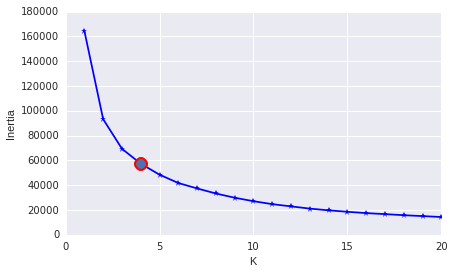

In [32]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

MODELS_DIR = "/home/laampt/orm/10K/"
MAX_K = 20

X = np.loadtxt(os.path.join(MODELS_DIR, "coords.csv"), delimiter="\t")
ks = range(1, MAX_K + 1)

inertias = np.zeros(MAX_K)
diff = np.zeros(MAX_K)
diff2 = np.zeros(MAX_K)
diff3 = np.zeros(MAX_K)
for k in ks:
    kmeans = KMeans(k).fit(X)
    inertias[k - 1] = kmeans.inertia_
    # first difference    
    if k > 1:
        diff[k - 1] = inertias[k - 1] - inertias[k - 2]
    # second difference
    if k > 2:
        diff2[k - 1] = diff[k - 1] - diff[k - 2]
    # third difference
    if k > 3:
        diff3[k - 1] = diff2[k - 1] - diff2[k - 2]

elbow = np.argmin(diff3[3:]) + 3

plt.plot(ks, inertias, "b*-")
plt.plot(ks[elbow], inertias[elbow], marker='o', markersize=12,
         markeredgewidth=2, markeredgecolor='r', markerfacecolor=None)
plt.ylabel("Inertia")
plt.xlabel("K")
plt.show()

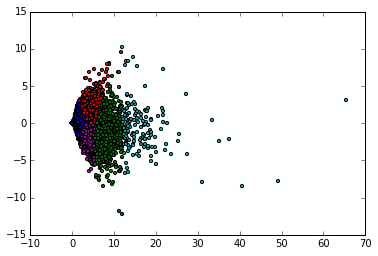

In [20]:
NUM_TOPICS = 9

X = np.loadtxt(os.path.join(MODELS_DIR, "coords.csv"), delimiter="\t")
kmeans = KMeans(NUM_TOPICS).fit(X)
y = kmeans.labels_

colors = ["b", "g", "r", "m", "c"]
for i in range(X.shape[0]):
    plt.scatter(X[i][0], X[i][1], c=colors[y[i]], s=10)    
plt.show()

> LDA

In [21]:
NUM_TOPICS = 5

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', 
                    level=logging.INFO)

# Project to LDA space
lda = gensim.models.LdaModel(corpus, id2word=dictionary, num_topics=NUM_TOPICS)

INFO:gensim.models.ldamodel:using symmetric alpha at 0.2
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online LDA training, 5 topics, 1 passes over the supplied corpus of 35245 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #2000/35245
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 2000 documents
DEBUG:gensim.models.ldamodel:21/2000 documents converged within 50 iterations
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 35245 documents
INFO:gensim.models.ldamodel:topic #0 (0.200): 0.029*là + 0.017*không + 0.014*có + 0.013*được + 0.010*cho + 0.009*mà + 0.009*người + 0.008*để + 0.008*ông + 0.008*một
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.019*không + 0.019*là + 0.017*có +

In [22]:
for t in lda.print_topics(NUM_TOPICS):
    print t + '\n'

INFO:gensim.models.ldamodel:topic #0 (0.200): 0.031*là + 0.025*không + 0.025*có + 0.017*người + 0.014*được + 0.014*một + 0.013*cho + 0.012*mà + 0.009*để + 0.008*đó
INFO:gensim.models.ldamodel:topic #1 (0.200): 0.021*là + 0.018*một + 0.015*người + 0.011*có + 0.011*ta + 0.010*cho + 0.010*không + 0.010*được + 0.008*để + 0.007*chúng
INFO:gensim.models.ldamodel:topic #2 (0.200): 0.010*không + 0.007*cho + 0.007*là + 0.006*có + 0.005*là + 0.005*có + 0.004*của + 0.004*được + 0.004*một + 0.004*được
INFO:gensim.models.ldamodel:topic #3 (0.200): 0.020*là + 0.017*Việt_Nam + 0.017*có + 0.012*một + 0.011*được + 0.010*không + 0.010*Trung_Quốc + 0.010*cho + 0.010*nước + 0.009*này
INFO:gensim.models.ldamodel:topic #4 (0.200): 0.015*ông + 0.011*bị + 0.010*là + 0.010*Nguyễn + 0.010*được + 0.009*cho + 0.009*có + 0.009*người + 0.008*năm + 0.008*đến


0.031*là + 0.025*không + 0.025*có + 0.017*người + 0.014*được + 0.014*một + 0.013*cho + 0.012*mà + 0.009*để + 0.008*đó

0.021*là + 0.018*một + 0.015*người + 0.011*có + 0.011*ta + 0.010*cho + 0.010*không + 0.010*được + 0.008*để + 0.007*chúng

0.010*không + 0.007*cho + 0.007*là + 0.006*có + 0.005*là + 0.005*có + 0.004*của + 0.004*được + 0.004*một + 0.004*được

0.020*là + 0.017*Việt_Nam + 0.017*có + 0.012*một + 0.011*được + 0.010*không + 0.010*Trung_Quốc + 0.010*cho + 0.010*nước + 0.009*này

0.015*ông + 0.011*bị + 0.010*là + 0.010*Nguyễn + 0.010*được + 0.009*cho + 0.009*có + 0.009*người + 0.008*năm + 0.008*đến



In [28]:
NUM_TOPICS = 9
lda2 = gensim.models.LdaModel(corpus_tfidf, id2word=dictionary, num_topics=NUM_TOPICS)
for t in lda2.print_topics(NUM_TOPICS):
    print t + '\n'

INFO:gensim.models.ldamodel:using symmetric alpha at 0.111111111111
INFO:gensim.models.ldamodel:using serial LDA version on this node
INFO:gensim.models.ldamodel:running online LDA training, 9 topics, 1 passes over the supplied corpus of 35245 documents, updating model once every 2000 documents, evaluating perplexity every 20000 documents, iterating 50x with a convergence threshold of 0.001000
INFO:gensim.models.ldamodel:PROGRESS: pass 0, at document #2000/35245
DEBUG:gensim.models.ldamodel:performing inference on a chunk of 2000 documents
DEBUG:gensim.models.ldamodel:1953/2000 documents converged within 50 iterations
DEBUG:gensim.models.ldamodel:updating topics
INFO:gensim.models.ldamodel:merging changes from 2000 documents into a model of 35245 documents
INFO:gensim.models.ldamodel:topic #2 (0.111): 0.004*ông + 0.004*Nguyễn + 0.002*Hùng + 0.002*Sinh + 0.002*họ + 0.002*làm + 0.002*để + 0.002*năm + 0.002*tỷ + 0.002*bị
INFO:gensim.models.ldamodel:topic #3 (0.111): 0.005*ông + 0.004*Sang

0.004*quốc_nội + 0.003*đa_đảng + 0.003*đa_nguyên + 0.002*trông + 0.002*khía_cạnh + 0.002*Toán + 0.002*đuợc + 0.002*lựa_chọn + 0.002*chương_trình + 0.001*phương_diện

0.004*Việt_Nam + 0.003*người + 0.003*ta + 0.003*một + 0.003*họ + 0.003*là + 0.003*không + 0.003*có + 0.003*được + 0.003*mà

0.007*đéo + 0.003*Ngài + 0.002*thả + 0.002*Truyển + 0.002*tình_yêu + 0.002*nhập + 0.002*đạo + 0.001*mười + 0.001*Con + 0.001*mài

0.003*Philippines + 0.002*tin_đồn + 0.002*khôn_ngoan + 0.002*đẩy_mạnh + 0.002*khơi + 0.002*bánh + 0.002*góc_độ + 0.001*ASEAN + 0.001*biên_giới + 0.001*chi_tiêu

0.004*linh_mục + 0.003*Cha + 0.002*Công_giáo + 0.002*Tổng_Thống + 0.002*Diệm + 0.002*xe + 0.002*Mẽo + 0.002*Đồng_Tháp + 0.001*hát + 0.001*hông

0.004*Thánh + 0.004*tượng + 0.003*thánh + 0.002*đức_tin + 0.002*web + 0.002*ngôn_ngữ + 0.002*Tuyên_ngôn + 0.002*Malaysia + 0.002*Đức_Mẹ + 0.002*tấm_gương

0.003*Thái_Lan + 0.003*ga + 0.002*tổn_thương + 0.002*Kính + 0.001*cảng + 0.001*bài_hát + 0.001*nhân_bản + 0.001*đáng_sợ 

In [30]:
final_topics = lda2.print_topics(NUM_TOPICS, num_words=30)
for t in final_topics:
    print t

INFO:gensim.models.ldamodel:topic #0 (0.111): 0.004*quốc_nội + 0.003*đa_đảng + 0.003*đa_nguyên + 0.002*trông + 0.002*khía_cạnh + 0.002*Toán + 0.002*đuợc + 0.002*lựa_chọn + 0.002*chương_trình + 0.001*phương_diện + 0.001*bình_an + 0.001*tị_nạn + 0.001*quỳ + 0.001*mơ_hồ + 0.001*Văn_Minh + 0.001*chuỗi + 0.001*ca_ngợi + 0.001*bá_quyền + 0.001*phụ_huynh + 0.001*Bất + 0.001*nổi_dậy + 0.001*vết_thương + 0.001*cảm + 0.001*thói_quen + 0.001*bất_ổn + 0.001*xăng_dầu + 0.001*ấn_tượng + 0.001*tiêu_thụ + 0.001*đau_khổ + 0.001*nhẹ_nhàng
INFO:gensim.models.ldamodel:topic #1 (0.111): 0.004*Việt_Nam + 0.003*người + 0.003*ta + 0.003*một + 0.003*họ + 0.003*là + 0.003*không + 0.003*có + 0.003*được + 0.003*mà + 0.003*để + 0.003*cho + 0.003*chúng + 0.003*nước + 0.003*mình + 0.003*đó + 0.003*Trung_Quốc + 0.002*anh + 0.002*này + 0.002*thể + 0.002*lại + 0.002*ở + 0.002*nhiều + 0.002*làm + 0.002*đi + 0.002*gì + 0.002*nói + 0.002*đến + 0.002*vào + 0.002*nào
INFO:gensim.models.ldamodel:topic #2 (0.111): 0.007*đéo +

0.004*quốc_nội + 0.003*đa_đảng + 0.003*đa_nguyên + 0.002*trông + 0.002*khía_cạnh + 0.002*Toán + 0.002*đuợc + 0.002*lựa_chọn + 0.002*chương_trình + 0.001*phương_diện + 0.001*bình_an + 0.001*tị_nạn + 0.001*quỳ + 0.001*mơ_hồ + 0.001*Văn_Minh + 0.001*chuỗi + 0.001*ca_ngợi + 0.001*bá_quyền + 0.001*phụ_huynh + 0.001*Bất + 0.001*nổi_dậy + 0.001*vết_thương + 0.001*cảm + 0.001*thói_quen + 0.001*bất_ổn + 0.001*xăng_dầu + 0.001*ấn_tượng + 0.001*tiêu_thụ + 0.001*đau_khổ + 0.001*nhẹ_nhàng
0.004*Việt_Nam + 0.003*người + 0.003*ta + 0.003*một + 0.003*họ + 0.003*là + 0.003*không + 0.003*có + 0.003*được + 0.003*mà + 0.003*để + 0.003*cho + 0.003*chúng + 0.003*nước + 0.003*mình + 0.003*đó + 0.003*Trung_Quốc + 0.002*anh + 0.002*này + 0.002*thể + 0.002*lại + 0.002*ở + 0.002*nhiều + 0.002*làm + 0.002*đi + 0.002*gì + 0.002*nói + 0.002*đến + 0.002*vào + 0.002*nào
0.007*đéo + 0.003*Ngài + 0.002*thả + 0.002*Truyển + 0.002*tình_yêu + 0.002*nhập + 0.002*đạo + 0.001*mười + 0.001*Con + 0.001*mài + 0.001*cu + 0.001*c

In [25]:
import wordcloud

In [26]:
%matplotlib inline https://drive.google.com/open?id=0B_6ojWkrZGYQRG5mUlQwNVhVOTg

from IPython.display import Image
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn

from sklearn import cross_validation
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
from sklearn import neighbors
from sklearn import linear_model
from sklearn import metrics
from sklearn import preprocessing

plt.style.use('fivethirtyeight') # Good looking plots
pd.set_option('display.max_columns', None) # Display any number of columns

import seaborn as sns

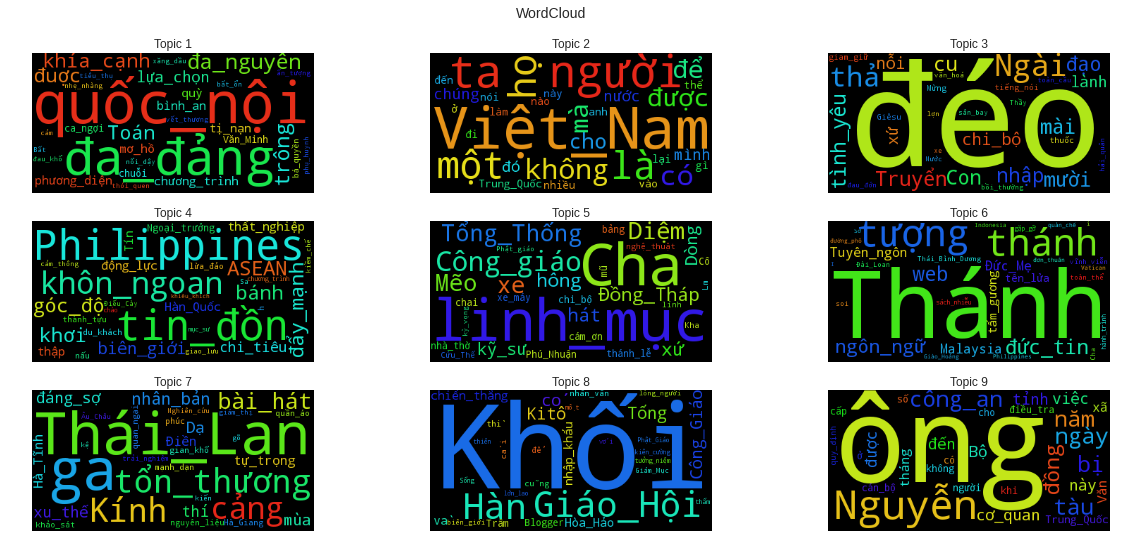

In [31]:
fix, ax = plt.subplots(figsize=(18, 8))
plt.suptitle('WordCloud')
for ii, line in enumerate(final_topics):
    line = line.strip()
    scores = [float(x.split("*")[0]) for x in line.split(" + ")]
    words = [x.split("*")[1] for x in line.split(" + ")]
    freqs = []
    for word, score in zip(words, scores):
        freqs.append((word, score))
    wc = wordcloud.WordCloud()
    wc.generate_from_frequencies(freqs)
    plt.subplot(3, 3, ii+1) # starts from 1
    plt.title("Topic {}".format(ii+1));
    plt.imshow(wc)
    plt.axis('off')

In [37]:
final_topics2 = lda2.print_topics(NUM_TOPICS, num_words=50)
with codecs.open("/home/laampt/orm/10K/final_9topics.csv", encoding="utf-8", mode="wb") as fout:
    for topic in final_topics2:
        fout.write(u"{}\n".format(topic))

INFO:gensim.models.ldamodel:topic #0 (0.111): 0.004*quốc_nội + 0.003*đa_đảng + 0.003*đa_nguyên + 0.002*trông + 0.002*khía_cạnh + 0.002*Toán + 0.002*đuợc + 0.002*lựa_chọn + 0.002*chương_trình + 0.001*phương_diện + 0.001*bình_an + 0.001*tị_nạn + 0.001*quỳ + 0.001*mơ_hồ + 0.001*Văn_Minh + 0.001*chuỗi + 0.001*ca_ngợi + 0.001*bá_quyền + 0.001*phụ_huynh + 0.001*Bất + 0.001*nổi_dậy + 0.001*vết_thương + 0.001*cảm + 0.001*thói_quen + 0.001*bất_ổn + 0.001*xăng_dầu + 0.001*ấn_tượng + 0.001*tiêu_thụ + 0.001*đau_khổ + 0.001*nhẹ_nhàng + 0.001*hàng_ngũ + 0.001*mùi + 0.001*tiếng_nói + 0.001*lưu_vong + 0.001*trung + 0.001*thân_yêu + 0.001*Canada + 0.001*khác_biệt + 0.001*Cộng_đồng + 0.001*San + 0.001*cường_quốc + 0.001*tư_hữu + 0.001*Diễn_đàn + 0.001*cám_dỗ + 0.001*đếm + 0.001*đế_quốc + 0.001*mạng_sống + 0.001*Quyền + 0.001*xóm + 0.001*tận_dụng
INFO:gensim.models.ldamodel:topic #1 (0.111): 0.004*Việt_Nam + 0.003*người + 0.003*ta + 0.003*một + 0.003*họ + 0.003*là + 0.003*không + 0.003*có + 0.003*được + 